In [ ]:
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (5,5)
import seaborn as sns

In [3]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import scvi
import muon as mu
from muon import atac as ac

In [4]:
# g = sns.FacetGrid(df, row="sample", hue="sample", aspect=3, height=1.5, legend_out=True)
def tss_lineplot(df, hue_key='sample'):

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    g = sns.lineplot(data=df, x="Distance from TSS, bp", y ='Average TSS Enrichment Score', hue=hue_key)

    plt.title('TSS Enrichment')
    plt.legend(bbox_to_anchor=(.5, -.15),ncol = 5,labels=df[hue_key].unique().tolist(),  frameon=False)


In [5]:
# g = sns.FacetGrid(df, row="sample", hue="sample", aspect=3, height=1.5, legend_out=True)
def fragment_size_distr_df(df, hue_key='sample'):

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    df.index = range(df.shape[0])
    sns.displot(data = df,x = 'length', kind='kde', hue='sample')
                
    plt.title('Fragment Size Distribution')
    plt.legend(bbox_to_anchor=(.5, -.15),ncol = 5,labels=df[hue_key].unique().tolist(),  frameon=False)
    # return df
# g = sns.FacetGrid(df, row="sample", hue="sample", aspect=3, height=1.5, legend_out=True)
def fragment_size_distr_atac(df_list, hue_key='sample'):

    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    df.index = range(df.shape[0])
    sns.displot(data = df,x = 'length', kind='kde', hue='sample')
                
    plt.title('Fragment Size Distribution')
    plt.legend(bbox_to_anchor=(.5, -.15),ncol = 5,labels=df[hue_key].unique().tolist(),  frameon=False)
    # return df

In [6]:
def fragment_size_distr_df(df, hue_key='sample'):
#     for atac in atac_list:
#         fragment_path = atac.uns["files"]["fragments"]
#         fragments = ac.tl.fetch_regions_to_df(fragment_path=fragment_path, features="chr1-1-2000000")

#         fragments["length"] = fragments.End - fragments.Start
#         fragments.set_index(keys="Cell", inplace=True)

#         fragments = fragments.join(atac.obs, how="right")
#         df_list.append(fragments)
# df2.loc[df2.index,'Distance from TSS, bp'] = df2['Distance from TSS, bp']+1
    sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.5)
    sns.set_style({'axes.facecolor':'white', 'grid.color': '0.8','axes.grid' : True, 'font.family':'Times New Roman'})
    # sorted(fragments['sample'].unique(), key=lambda value:float(value.split('_')[-1])) ## alternative sorting
    df = df.sort_values(hue_key)
    # sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    df.index = range(df.shape[0])
    print(df.shape)
   

    fig = plt.figure()
    ax  = fig.add_subplot(111)
    color_list = sns.color_palette("tab20",len(df[hue_key].unique().tolist()))
    palette = {}
    for n,i in enumerate(np.sort(df[hue_key].unique())):
        palette[i] = color_list[n]
        
    
    g = sns.histplot(data = df,x = 'length', hue='sample',lw=0.001,element='poly',palette =palette,kde =True,kde_kws={'gridsize':1200},line_kws={'lw':4},fill=False)
    #    sns.kdeplot(data = df,x = 'length', kind='kde', hue='sample',height=4, aspect=1.7,ax=ax)
    # g._legend.remove()
    # plt.legend(title='sample')
    print(df[hue_key].unique().tolist())
    cmap = sns.color_palette("tab20", 8, as_cmap=True)
    # cmap_l = sns.color_palette("hls", len(data[x_key].unique().tolist()))
    color_list = sns.color_palette("tab20",len(df[hue_key].unique().tolist()))
    palette = {}
    for n,i in enumerate(np.sort(df[hue_key].unique())):
        palette[i] = color_list[n]
    leg = ax.legend(labels=np.sort(fragments[hue_key].unique()))#(bbox_to_anchor=(1, -.15),ncol = 6,labels=df[hue_key].unique().tolist(),fontsize=12, frameon=False)    # # leg = leg_
    #    
    # for n,i in enumerate(df[hue_key].unique().tolist()):
    #     palette[i] = color_list[n]
    # leg = ax.legend(labels=fragments['sample'].unique().tolist())#(bbox_to_anchor=(1, -.15),ncol = 6,labels=df[hue_key].unique().tolist(),fontsize=12, frameon=False)    # # leg = leg_
    # #         # change the line width for the legend
    for n,line in enumerate(leg.get_lines()):
        line.set_linewidth(8.0) 
        line.set_color(color_list[n])
    g.set_title('Fragment Size Distribution')
    g.set(xlabel='Fragments Counts', ylabel= 'Fragment Size (bp)')
    g.set_xlim(0, 700)
    g.set_ylim(0, 5000)
    plt.savefig('figures/Fragment_Size_distib.png')
    # return df


In [ ]:
def boxplot(data, y_key='tss_score', x_key = 'sample', cmap = "hls", y_name = 'provide_it_as _y_name', y_lim=2.5, add_info ='') :
    # data = atac.obs.copy()
    cmap = sns.color_palette("tab20", 8, as_cmap=True)
    # cmap_l = sns.color_palette("hls", len(data[x_key].unique().tolist()))
    color_list = sns.color_palette("tab20",len(df[hue_key].unique().tolist()))
    fig, ax = plt.subplots()
    # ax.set_ylim(0, 4)
    data = data.sort_values(x_key)

    g1 = sns.stripplot(data, y=y_key, x = x_key,ax=ax,jitter=0.4, size = 0.6,palette = cmap_l, native_scale =True)
    l1 = g1.axhline(2500, color='limegreen', label = 'Lower Cut-off',linewidth = 3, linestyle = '--')
    l2 = g1.axhline(20000, color='red', label = 'Upper Cut-off',linewidth = 3, linestyle = '--')

    ax2 = ax.twinx()
    g2 = sns.boxplot(data, y=y_key,x = x_key,width= 0.8, flierprops = dict(markerfacecolor = '0.50', markersize = 2),saturation=0.9, palette = cmap_l,ax=ax2)
    g2.set(yticklabels=[]) 
    g2.set(ylim=(0,y_lim))

    g2.set(ylabel=None)  # remove the axis label
    ax.set(ylim=(0,y_lim))
    ax.set(ylabel=y_name)

    plt.savefig(f'figures/boxplot_{y_key}_{y_lim}_max_{add_info}.png')
    return g2

def boxplot_nuc(data, y_key='tss_score', x_key = 'sample', cmap = "hls", y_name = 'provide_it_as _y_name', y_lim=2.5, add_info ='') :
    # data = atac.obs.copy()
    cmap = sns.color_palette("tab20", 8, as_cmap=True)
    # cmap_l = sns.color_palette("hls", len(data[x_key].unique().tolist()))
    cmap_l = sns.color_palette("tab20",len(df[x_key].unique().tolist()))
    fig, ax = plt.subplots()
    # ax.set_ylim(0, 4)
    data = data.sort_values(x_key)

    g1 = sns.stripplot(data, y=y_key, x = x_key,ax=ax,jitter=0.4, size = 0.6,palette = cmap_l, native_scale =True)
    l1 = g1.axhline(4, color='red', label = 'Lower Cut-off',linewidth = 3, linestyle = '--')

    ax2 = ax.twinx()
    g2 = sns.boxplot(data, y=y_key,x = x_key,width= 0.8, flierprops = dict(markerfacecolor = '0.50', markersize = 2),saturation=0.9, palette = cmap_l,ax=ax2)
    g2.set(yticklabels=[]) 
    g2.set(ylim=(0,y_lim))

    g2.set(ylabel=None)  # remove the axis label
    ax.set(ylim=(0,y_lim))
    ax.set(ylabel=y_name)

    plt.savefig(f'figures/boxplot_{y_key}_{y_lim}_max_{add_info}.png')
    return g2

def boxplot_counts(data, y_key='tss_score', x_key = 'sample', cmap = "hls", y_name = 'provide_it_as _y_name', y_lim=2.5, add_info ='') :
    # data = atac.obs.copy()
    cmap = sns.color_palette("tab20", 8, as_cmap=True)
    # cmap_l = sns.color_palette("hls", len(data[x_key].unique().tolist()))
    cmap_l = sns.color_palette("tab20",len(df[x_key].unique().tolist()))
    fig, ax = plt.subplots()
    # ax.set_ylim(0, 4)
    data = data.sort_values(x_key)

    g1 = sns.stripplot(data, y=y_key, x = x_key,ax=ax,jitter=0.4, size = 0.6,palette = cmap_l, native_scale =True)
    l1 = g1.axhline(2500, color='black', label = 'Lower Cut-off',linewidth = 3, linestyle = '--')
    l2 = g1.axhline(30000, color='red', label = 'Upper Cut-off',linewidth = 3, linestyle = '--')

    ax2 = ax.twinx()
    g2 = sns.boxplot(data, y=y_key,x = x_key,width= 0.8, flierprops = dict(markerfacecolor = '0.50', markersize = 2),saturation=0.9, palette = cmap_l,ax=ax2)
    g2.set(yticklabels=[]) 
    # g2.set(ylim=(0,y_lim))

      # remove the axis label
    # ax.set(ylim=(0,y_lim))
    ax.set(ylabel=y_name)
    ax.set_yscale('log')
    ax2.set_yscale('log')

    leg = g2.legend([l1,l2],['Lowwe Cut-Off','Upper Cut-Off'],fontsize = 14, title = 'QC values on nº of Features',
    fancybox=False, ncol=1,   bbox_to_anchor = (1.05,1))
    g2.set(ylabel=None)
    plt.savefig(f'figures/boxplot_{y_key}_{y_lim}_max_{add_info}.png')
    return g2

def boxplot_log_counts(data, y_key='tss_score', x_key = 'sample', cmap = "hls", y_name = 'provide_it_as _y_name', y_lim=2.5, add_info ='') :
    # data = atac.obs.copy()
    cmap = sns.color_palette("tab20", 8, as_cmap=True)
    # cmap_l = sns.color_palette("hls", len(data[x_key].unique().tolist()))
    cmap_l = sns.color_palette("tab20",len(df[x_key].unique().tolist()))
    fig, ax = plt.subplots()
    # ax.set_ylim(0, 4)
    data = data.sort_values(x_key)

    g1 = sns.stripplot(data, y=y_key, x = x_key,ax=ax,jitter=0.4, size = 0.6,palette = cmap_l, native_scale =True)
    l1 = g1.axhline(np.log10(2500), color='black', label = 'Lower Cut-off',linewidth = 3, linestyle = '--')
    l2 = g1.axhline(np.log10(30000), color='red', label = 'Upper Cut-off',linewidth = 3, linestyle = '--')

    ax2 = ax.twinx()
    g2 = sns.boxplot(data, y=y_key,x = x_key,width= 0.8, flierprops = dict(markerfacecolor = '0.50', markersize = 2),saturation=0.9, palette = cmap_l,ax=ax2)
    g2.set(yticklabels=[]) 
    # g2.set(ylim=(0,y_lim))

      # remove the axis label
    # ax.set(ylim=(0,y_lim))
    ax.set(ylabel=y_name)


    leg = g2.legend([l1,l2],['Lower Cut-Off','Upper Cut-Off'],fontsize = 14, title = 'QC values on nº of Features',
    fancybox=False, ncol=1,   bbox_to_anchor = (1.05,1))
    g2.set(ylabel=None)
    plt.savefig(f'figures/boxplot_{y_key}_{y_lim}_max_{add_info}.png')
    return g2


In [16]:
sample_color_dic = {'lib_09': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'lib_10': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'lib_15': (1.0, 0.4980392156862745, 0.054901960784313725),
 'lib_23': (1.0, 0.7333333333333333, 0.47058823529411764),
 'lib_29': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'lib_34': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'lib_36': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'lib_38': (1.0, 0.596078431372549, 0.5882352941176471),
 'lib_51': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'lib_54': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'lib_55': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'lib_56': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'lib_57': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)}
def assign_lib_from_index(adata, sample_key = 'sample', csv_path = '../../../data/AGG/outs/aggr.csv'):
    aggr = pd.read_csv('../../../data/AGG/outs/aggr.csv')
    lib_idx = [int(index.split('-')[-1]) for index in adata.obs.index.tolist()]
    adata.obs['sample'] = [aggr.iloc[int(n-1)]['library_id'] for n in lib_idx]
    return adata
def assign_lib_from_index_df(df, sample_key = 'sample', csv_path = '../../../data/AGG/outs/aggr.csv'):
    aggr = pd.read_csv('../../../data/AGG/outs/aggr.csv')
    lib_idx = [int(index.split('-')[-1]) for index in df.index.tolist()]
    df['sample'] = [aggr.iloc[int(n-1)]['library_id'] for n in lib_idx]
    return df

# Load Data

In [9]:
pd.read_csv('../../../data/AGG/outs/aggr.csv')

,library_id,atac_fragments,per_barcode_metrics,gex_molecule_info
0,lib_09,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...
1,lib_10,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...
2,lib_15,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_06-07/CZI...,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_06-07/CZI...,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_06-07/CZI...
3,lib_23,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...
4,lib_29,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...
5,lib_34,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_06-07/CZI...,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_06-07/CZI...,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_06-07/CZI...
6,lib_36,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_kidney_03...,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_kidney_03...,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_kidney_03...
7,lib_38,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_06-07/CZI...,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_06-07/CZI...,/ijc/LABS/MEREU/RAW/CZI/MULTIOME/CZI_06-07/CZI...
8,lib_51,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...
9,lib_54,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...,/mnt/beegfs/macera/CZI/MULTI/Cellrange_COUNT/l...


In [10]:
mdata= mu.read_10x_h5(f"../../../data/AGG/outs/filtered_feature_bc_matrix.h5")
atac = mdata.mod['atac']


/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from ../../../data/AGG/outs/filtered_feature_bc_matrix.h5


/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/mudata/_core/mudata.py:446: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


Added peak annotation from ../../../data/AGG/outs/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: ../../../data/AGG/outs/atac_fragments.tsv.gz


In [11]:
sc.pp.filter_cells(atac, min_counts=1)
sc.pp.filter_genes(atac, min_counts=1)

In [12]:

sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

In [13]:
atac = assign_lib_from_index(atac)

In [14]:
df = pd.DataFrame(atac.obs['sample'].value_counts().index, index = atac.obs['sample'].value_counts().index  , columns =[ 'samples' ])
df['n_cells'] = atac.obs['sample'].value_counts().values.astype(int)

<AxesSubplot:title={'center':'Total nº of Cells'}, xlabel='samples'>

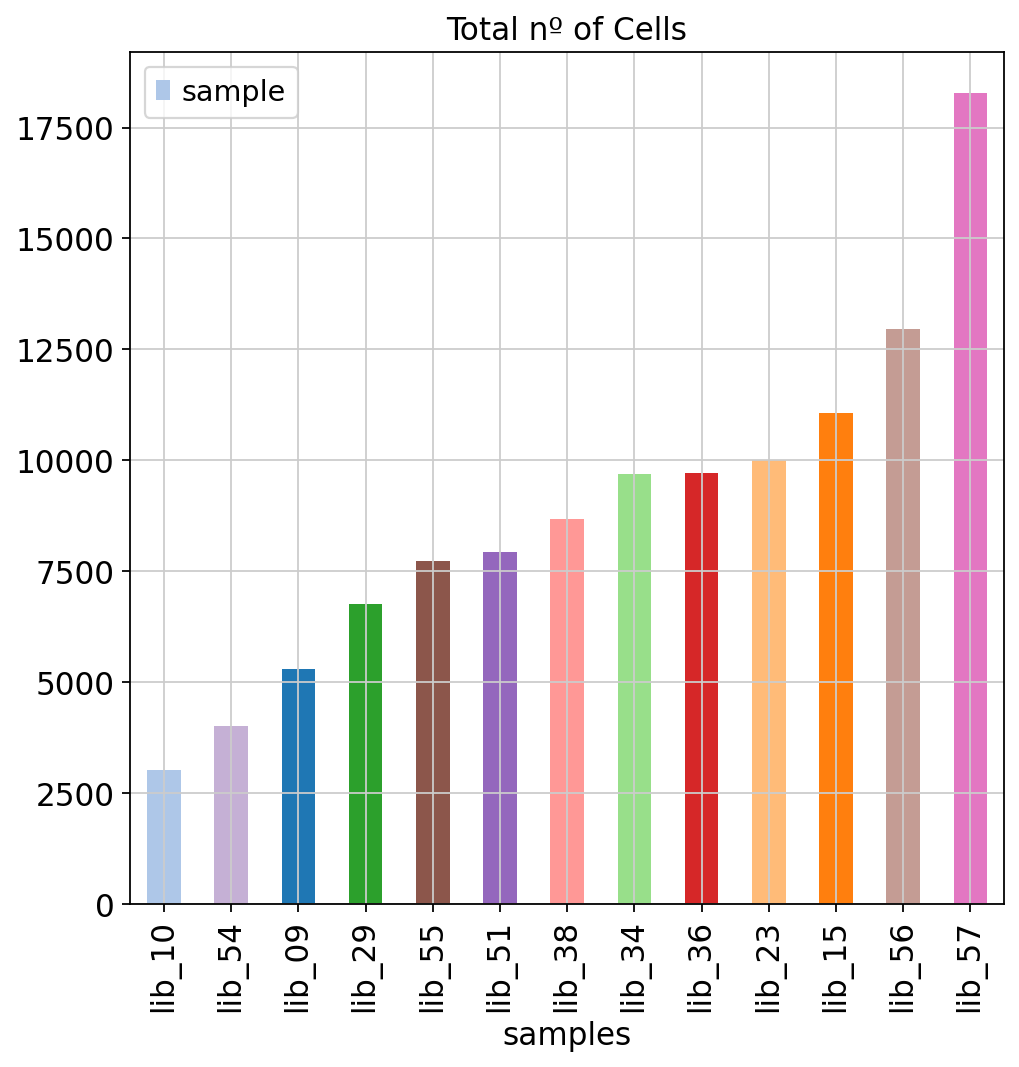

In [18]:
sc.settings.set_figure_params(figsize=('7', '7'), color_map='gist_earth')
df.reindex(index=np.argsort(df['n_cells']).index.tolist()[::-1]).plot(kind='bar', x = 'samples', y ='n_cells', label ='sample', color = [sample_color_dic[i] for i in np.argsort(df['n_cells']).index.tolist()[::-1]], title = 'Total nº of Cells' )

In [11]:
atac = assign_lib_from_index(atac)

In [ ]:
atac.obs['sample'].unique()

array(['lib_15', 'lib_36', 'lib_38', 'lib_09', 'lib_57', 'lib_23',
       'lib_55', 'lib_51', 'lib_56', 'lib_34', 'lib_54', 'lib_29',
       'lib_10'], dtype=object)

# Saving prefiltered object

In [ ]:
mdata['atac'].write(f'objects/atac.h5ad', compression = 'gzip')

# Generate QC plots

In [13]:
fragments = pd.read_csv(f'objects/fragments.csv',index_col=0)
fragments = assign_lib_from_index_df(fragments)

(1589735, 12)
['lib_09', 'lib_10', 'lib_15', 'lib_23', 'lib_29', 'lib_34', 'lib_36', 'lib_38', 'lib_51', 'lib_54', 'lib_55', 'lib_56', 'lib_57']


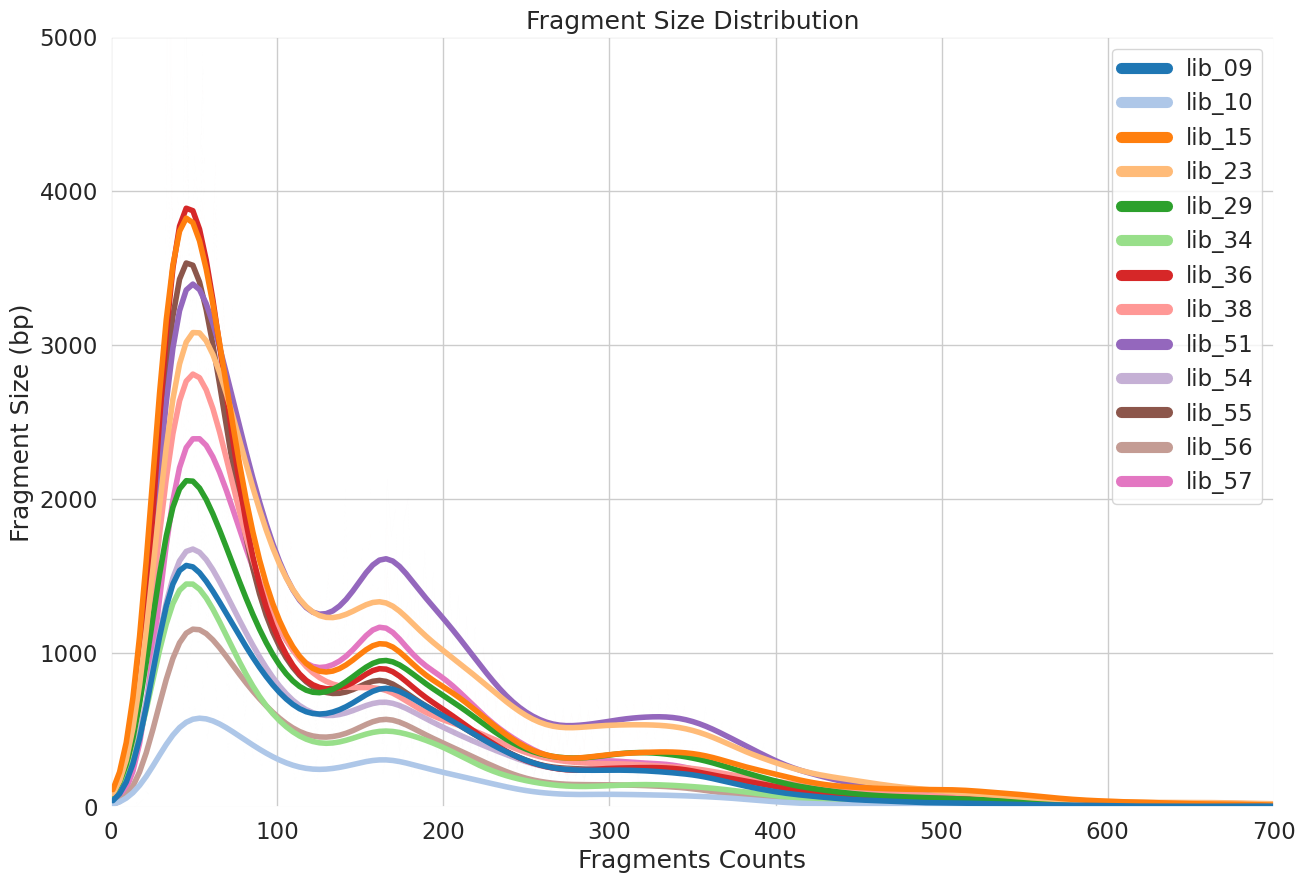

In [21]:
fragment_size_distr_df(fragments)

In [63]:
df = pd.read_csv('objects/atac_obs.csv', index_col=0)
df = assign_lib_from_index_df(df)

/tmp/ipykernel_5013/735357549.py:35: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g1 = sns.stripplot(data, y=y_key, x = x_key,ax=ax,jitter=0.4, size = 0.6,palette = cmap_l, native_scale =True)


<AxesSubplot:xlabel='sample'>

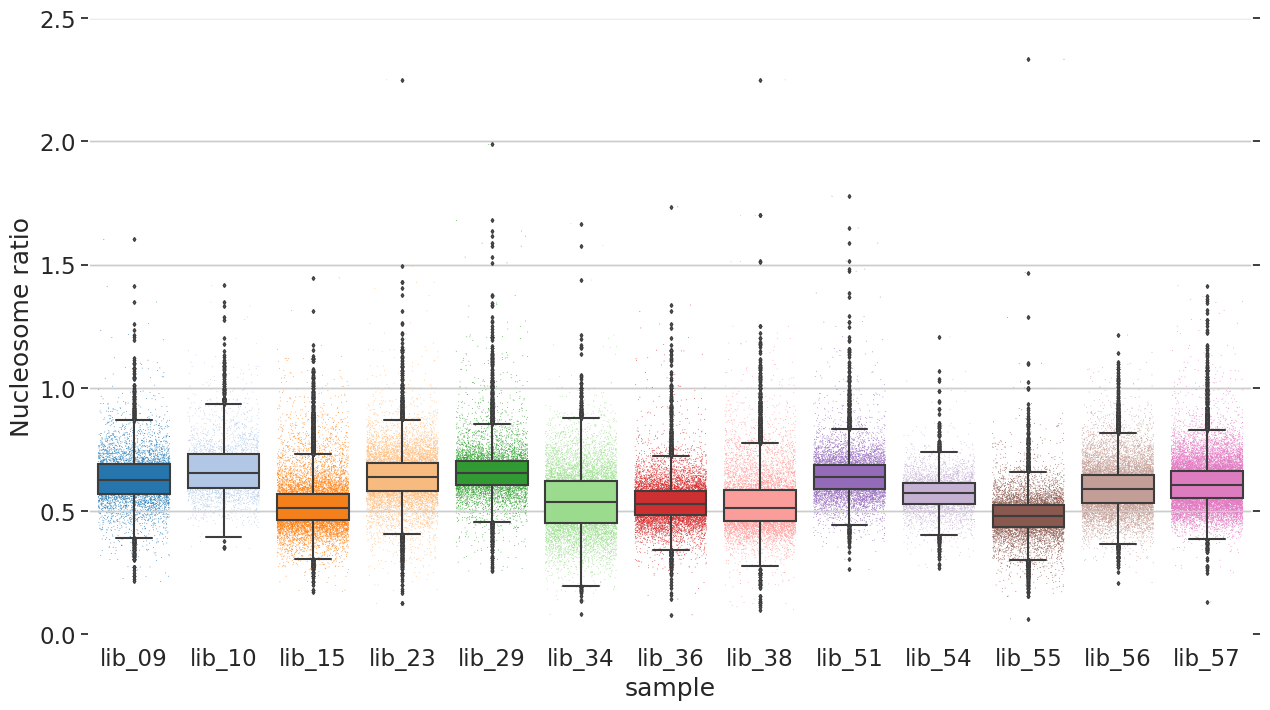

In [69]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '0.8','axes.grid' : True, 'font.family':'Times New Roman'})
boxplot_nuc(df,y_key='nucleosome_signal', y_name='Nucleosome ratio')

/tmp/ipykernel_5013/735357549.py:59: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g1 = sns.stripplot(data, y=y_key, x = x_key,ax=ax,jitter=0.4, size = 0.6,palette = cmap_l, native_scale =True)


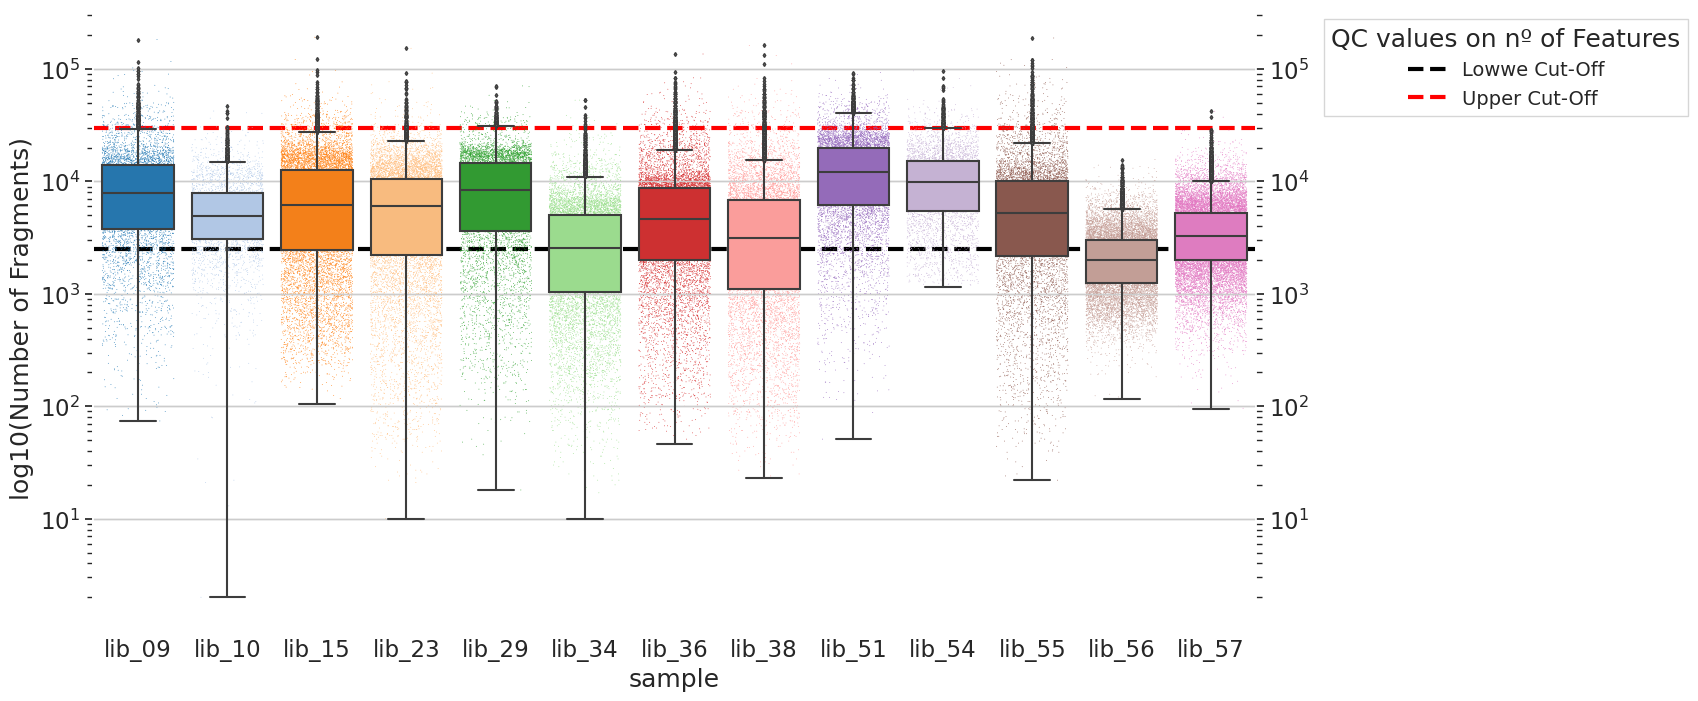

In [70]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '0.8','axes.grid' : True, 'font.family':'Times New Roman'})
g = boxplot_counts(df,y_key='total_counts',y_name = 'log10(Number of Fragments)')

plt.show()


In [23]:
tss = sc.read(f'objects/tss.h5ad', index_col=0)
tss = assign_lib_from_index(tss)

In [ ]:
tss

In [75]:
def tss_boxplot(data, y_key='tss_score', x_key = 'sample', cmap = "hls", y_lim = 35) :

    fig, ax = plt.subplots()
    ax.set(ylim=(0,y_lim))
    cmap = sns.color_palette("tab20", 8, as_cmap=True)
    # cmap_l = sns.color_palette("hls", len(data[x_key].unique().tolist()))
    cmap_l = sns.color_palette("tab20",len(df[x_key].unique().tolist()))
    data = data.sort_values(x_key)

    sns.stripplot(data, y='tss_score', x = 'sample',ax=ax,jitter=0.4, size = 1,palette = cmap_l, native_scale =True)
    ax.set(ylabel='TSS Enrichment Score')
    ax2 = ax.twinx()
    ax2.set(ylim=(0,y_lim))

    g2 = sns.boxplot(data, y='tss_score',x = 'sample',width= 0.8, flierprops = dict(markerfacecolor = '0.50', markersize = 0), palette = cmap_l,ax=ax2)
    g2.set(yticklabels=[]) 
    g2.set(ylabel=None)  # remove the axis label
    ax.set(xlabel=None)  # remove the axis label
    ax.axhline(2, color='black', label = 'Lower Cut-off',linewidth = 3, linestyle = '--')

    plt.savefig(f'figures/boxplot_tss_{y_lim}_max.png')
    plt.show()


/tmp/ipykernel_5013/106939110.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data, y='tss_score', x = 'sample',ax=ax,jitter=0.4, size = 1,palette = cmap_l, native_scale =True)


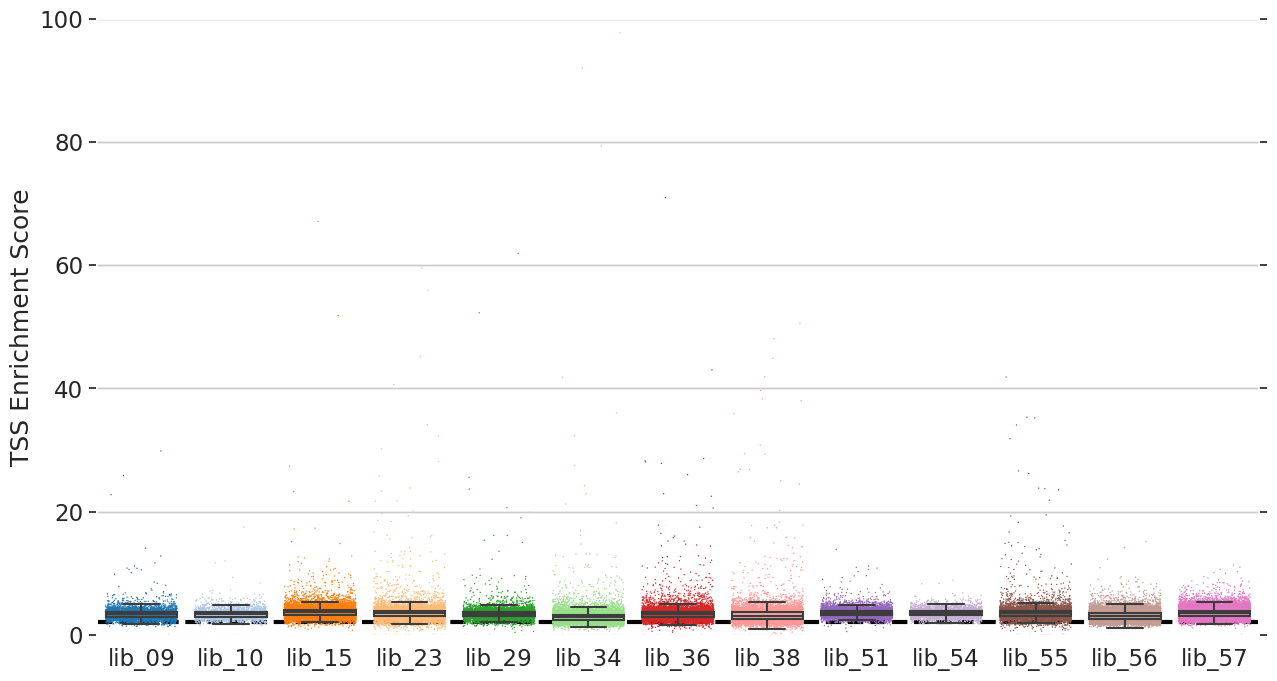

In [76]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '0.8','axes.grid' : True, 'font.family':'Times New Roman'})
df_list_ = tss_boxplot(tss.obs, y_lim=100)

/tmp/ipykernel_5013/106939110.py:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data, y='tss_score', x = 'sample',ax=ax,jitter=0.4, size = 1,palette = cmap_l, native_scale =True)


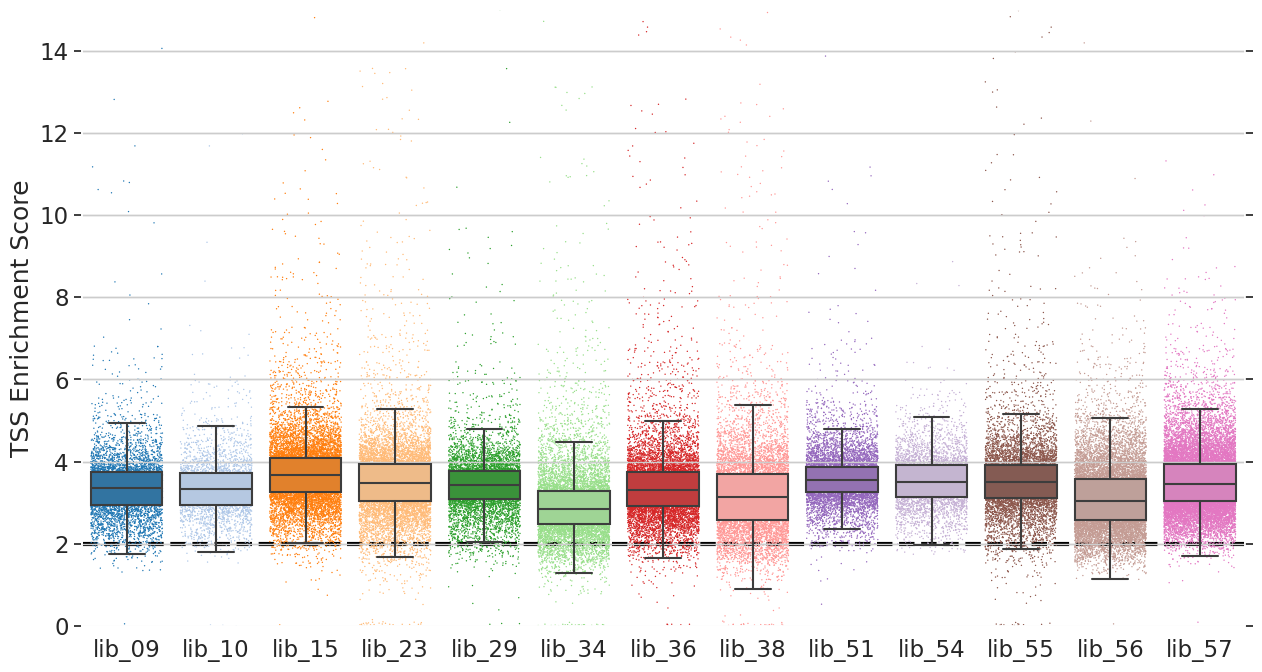

In [77]:
df_list_tss = tss_boxplot(tss.obs, y_lim = 15)

In [38]:
# g = sns.FacetGrid(df, row="sample", hue="sample", aspect=3, height=1.5, legend_out=True)
def tss_lineplot_all(tss,fontsize=7, hue_key='sample'):
    df_list = []
    for sample in np.sort(tss.obs['sample'].unique()):
        tss_ = tss[tss.obs['sample'].isin([sample])].copy()

        print(tss_.shape,tss_.obs['sample'][0])
        tss_.var['Average TSS Enrichment Score'] =np.mean(tss_.X, axis = 0)
        tss_.var['Distance from TSS, bp'] = tss_.var['TSS_position'].copy()
        df = tss_.var[['Average TSS Enrichment Score','Distance from TSS, bp']]
        df['sample']=sample
        df_list.append(df)
        # df2.loc[df2.index,'Distance from TSS, bp'] = df2['Distance from TSS, bp']+1
    df = pd.concat(df_list, ignore_index = True)

    print(df['sample'].unique())
    sns.set_style({'axes.facecolor':'white', 'grid.color': '0.8','axes.grid' : True, 'font.family':'Times New Roman'})
    df = df.sort_values(hue_key)

    g = sns.lineplot(data=df, x="Distance from TSS, bp", y ='Average TSS Enrichment Score', hue=hue_key, lw=3)

    plt.title('TSS Enrichment')
    color_list = sns.color_palette("tab20",len(df[hue_key].unique().tolist()))
    palette = {}
    for n,i in enumerate(np.sort(df[hue_key].unique())):
        palette[i] = color_list[n]
    leg = plt.legend(bbox_to_anchor=(1, -.15),ncol = 6,labels=df[hue_key].unique().tolist(),fontsize=12, frameon=False)    # # leg = leg_
    #         # change the line width for the legend
    for n,line in enumerate(leg.get_lines()):
        line.set_linewidth(8.0) 
        line.set_color(color_list[n])
    g.set(ylim=(0,15))
    plt.savefig('figures/lineplots_tss_distib.png')


def tss_lineplot_high(tss,fontsize=7, hue_key='sample'):
    

    tss = tss[tss.obs['tss_score']>2].copy()
    df_list = []
    for sample in np.sort(tss.obs['sample'].unique()):
        tss_ = tss[tss.obs['sample'].isin([sample])].copy()

        print(tss_.shape,tss_.obs['sample'][0])
        tss_.var['Average TSS Enrichment Score'] =np.mean(tss_.X, axis = 0)
        tss_.var['Distance from TSS, bp'] = tss_.var['TSS_position'].copy()
        df = tss_.var[['Average TSS Enrichment Score','Distance from TSS, bp']]
        df['sample']=sample
        df_list.append(df)
        # df2.loc[df2.index,'Distance from TSS, bp'] = df2['Distance from TSS, bp']+1
    df = pd.concat(df_list, ignore_index = True)

    print(df['sample'].unique())
    sns.set_style({'axes.facecolor':'white', 'grid.color': '0.8','axes.grid' : True, 'font.family':'Times New Roman'})
    df = df.sort_values(hue_key)
    
    color_list = sns.color_palette("tab20",len(df[hue_key].unique().tolist()))
    palette = {}
    for n,i in enumerate(np.sort(df[hue_key].unique().tolist())):
        palette[i] = color_list[n]
    g = sns.lineplot(data=df, x="Distance from TSS, bp", y ='Average TSS Enrichment Score', hue=hue_key, lw=2.5, palette=palette)

    plt.title('High')

   
    leg = plt.legend(bbox_to_anchor=(1, -.15),ncol = 6,labels=df[hue_key].unique().tolist(),fontsize=12, frameon=False)    # # leg = leg_
    #         # change the line width for the legend
    for n,line in enumerate(leg.get_lines()):
        line.set_linewidth(8.0) 
        line.set_color(color_list[n])
    g.set(ylim=(0,6))
    plt.savefig('figures/lineplots_tss_high.png')
  
        
        
def tss_lineplot_low(tss,fontsize=7, hue_key='sample'):

    tss = tss[tss.obs['tss_score']<2].copy()
    df_list = []
    for sample in np.sort(tss.obs['sample'].unique()):
        tss_ = tss[tss.obs['sample'].isin([sample])].copy()

        print(tss_.shape,tss_.obs['sample'][0])
        tss_.var['Average TSS Enrichment Score'] =np.mean(tss_.X, axis = 0)
        tss_.var['Distance from TSS, bp'] = tss_.var['TSS_position'].copy()
        df = tss_.var[['Average TSS Enrichment Score','Distance from TSS, bp']]
        df['sample']=sample
        df_list.append(df)
        # df2.loc[df2.index,'Distance from TSS, bp'] = df2['Distance from TSS, bp']+1
    df = pd.concat(df_list, ignore_index = True)


    sns.set_style({'axes.facecolor':'white', 'grid.color': '0.8','axes.grid' : True, 'font.family':'Times New Roman'})
    df = df.sort_values(hue_key)

    color_list = sns.color_palette("tab20",len(df[hue_key].unique().tolist()))
    palette = {}
    for n,i in enumerate(np.sort(df[hue_key].unique().tolist())):
        palette[i] = color_list[n]
    
    g = sns.lineplot(data=df, x="Distance from TSS, bp", y ='Average TSS Enrichment Score', hue=hue_key, lw=2.5, palette = palette)

    plt.title('Low')

    leg = plt.legend(bbox_to_anchor=(1, -.15),ncol = 6,labels=df[hue_key].unique().tolist(),fontsize=12, frameon=False)    # # leg = leg_
    #         # change the line width for the legend
    for n,line in enumerate(leg.get_lines()):
        line.set_linewidth(8.0) 
        line.set_color(color_list[n])    
    g.set(ylim=(0,6))
    plt.savefig('figures/lineplots_tss_low.png')


In [79]:
sns.set(rc={'figure.figsize':(10,8)}, font_scale=2)
sns.set_style({'axes.facecolor':'white', 'grid.color': '0.8','axes.grid' : True, 'font.family':'Times New Roman'})

(5178, 2001) lib_09
(2957, 2001) lib_10
(10932, 2001) lib_15
(9670, 2001) lib_23
(6610, 2001) lib_29
(8874, 2001) lib_34
(9432, 2001) lib_36
(7933, 2001) lib_38
(7901, 2001) lib_51
(3976, 2001) lib_54
(7517, 2001) lib_55
(12215, 2001) lib_56
(18117, 2001) lib_57
['lib_09' 'lib_10' 'lib_15' 'lib_23' 'lib_29' 'lib_34' 'lib_36' 'lib_38'
 'lib_51' 'lib_54' 'lib_55' 'lib_56' 'lib_57']


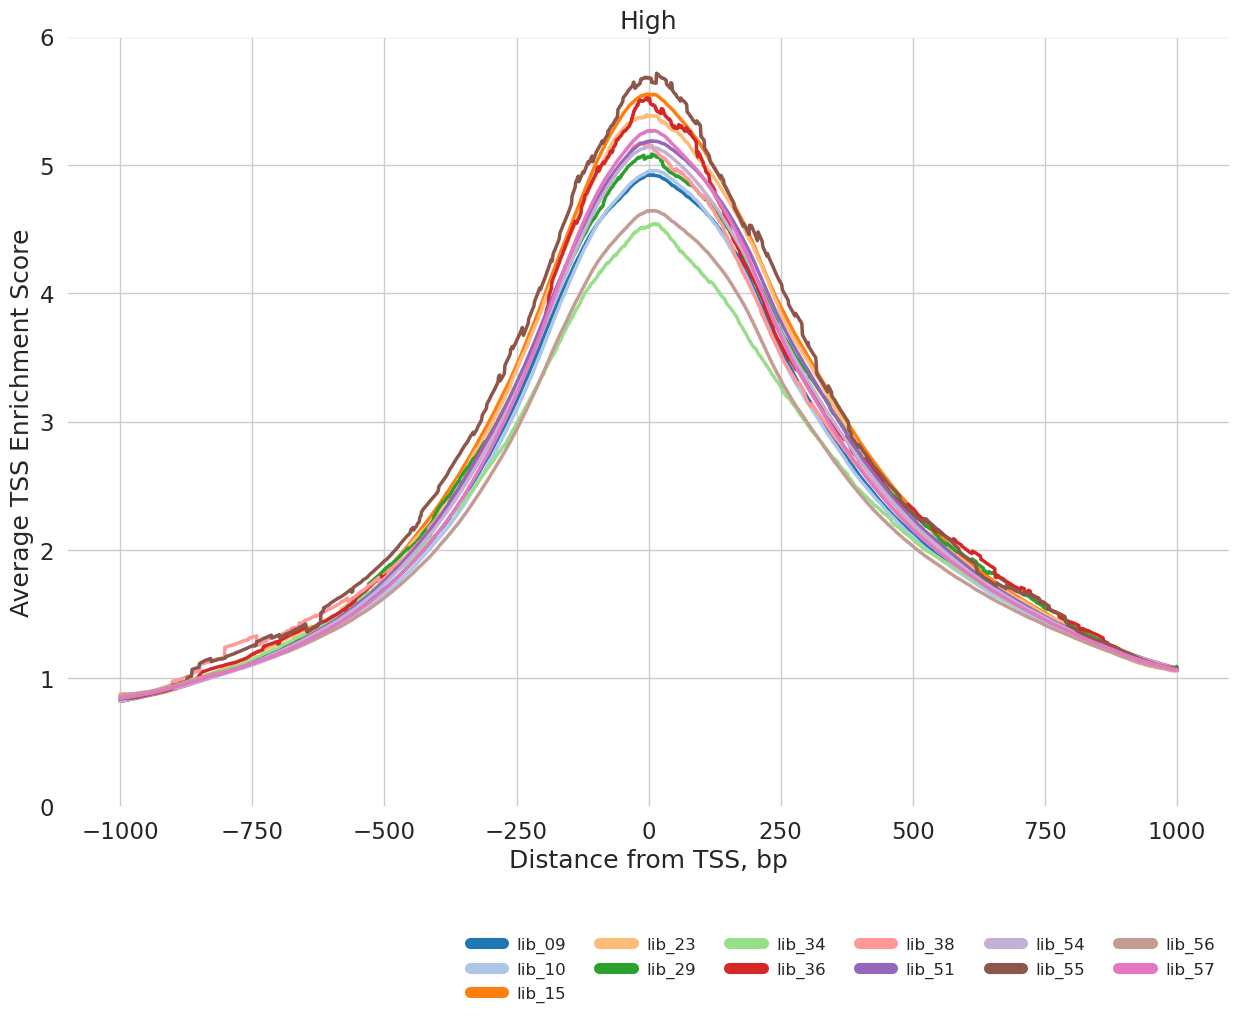

In [39]:
tss_lineplot_high(tss)

(109, 2001) lib_09
(47, 2001) lib_10
(121, 2001) lib_15
(324, 2001) lib_23
(141, 2001) lib_29
(818, 2001) lib_34
(275, 2001) lib_36
(734, 2001) lib_38
(35, 2001) lib_51
(27, 2001) lib_54
(197, 2001) lib_55
(741, 2001) lib_56
(164, 2001) lib_57


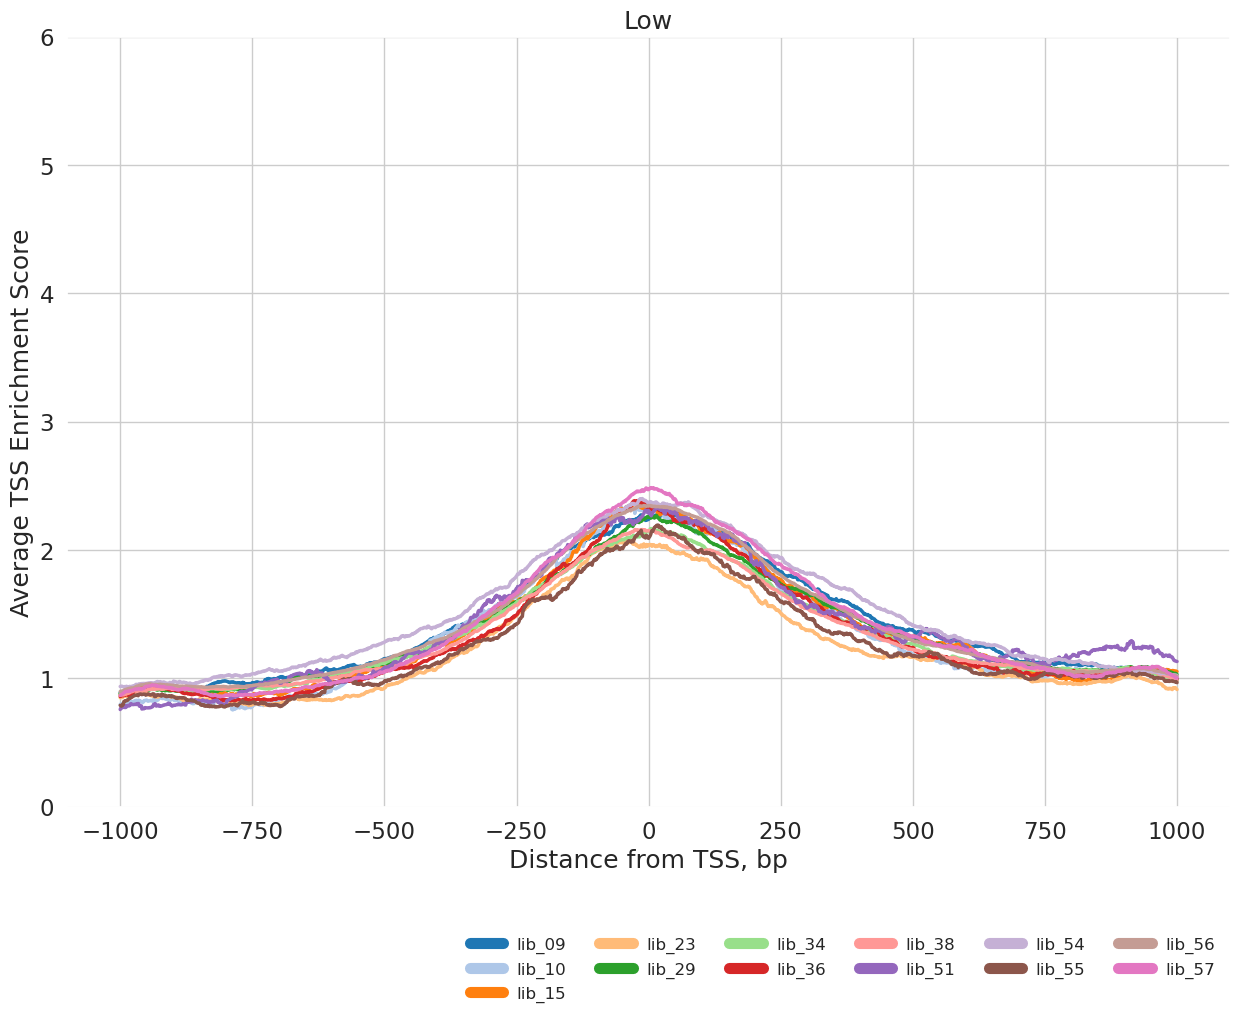

In [40]:
tss_lineplot_low(tss)

In [83]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1)

3882.0


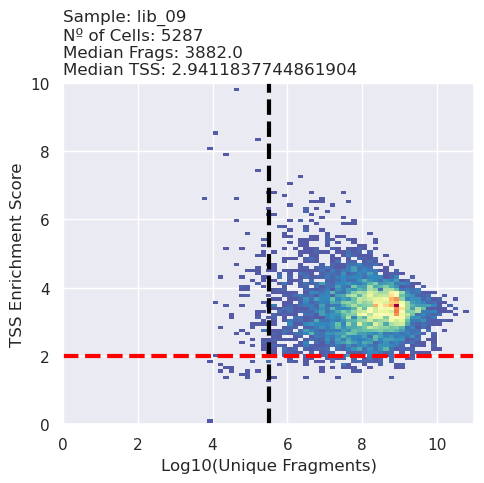

2516.5


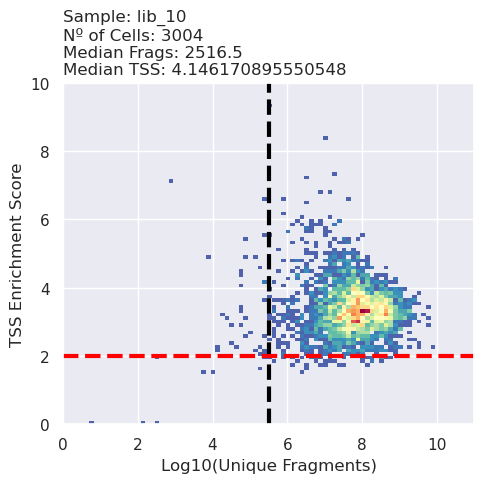

3150.0


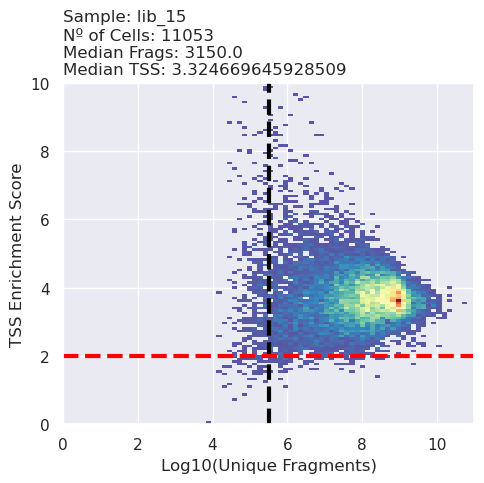

3047.5


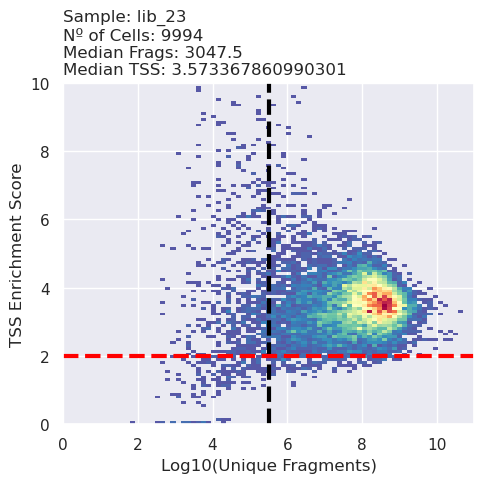

4129.0


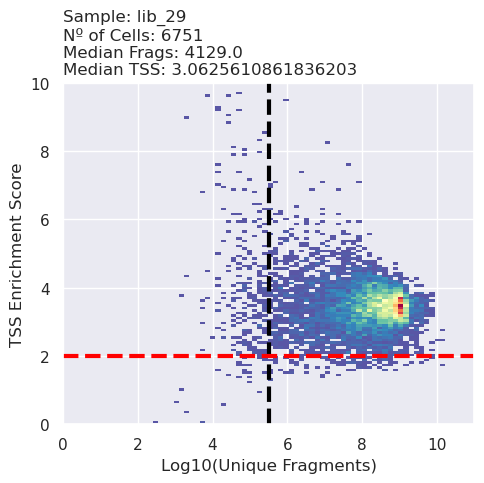

1374.5


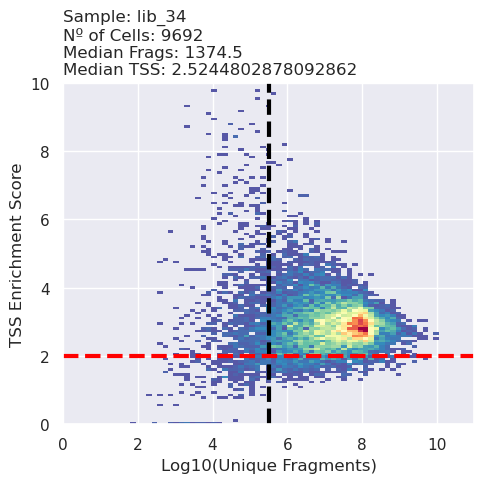

2349.0


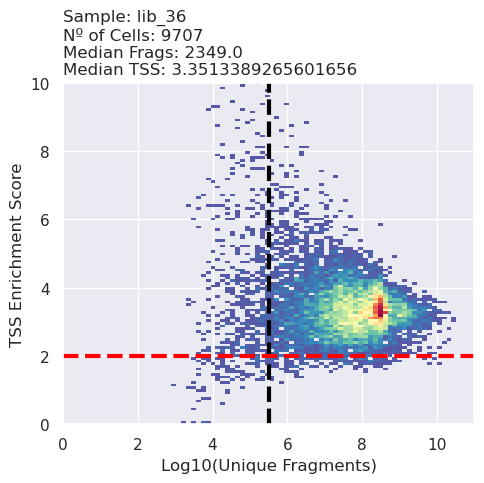

1634.0


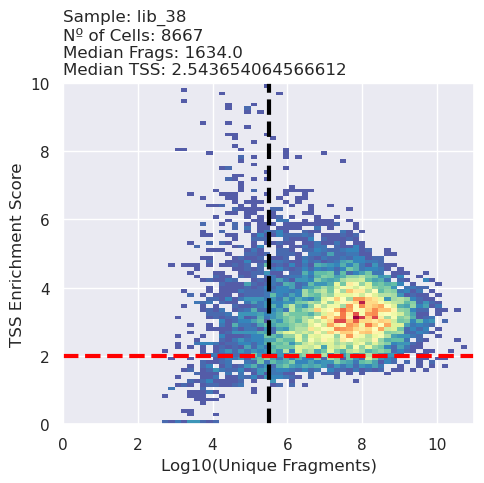

5789.5


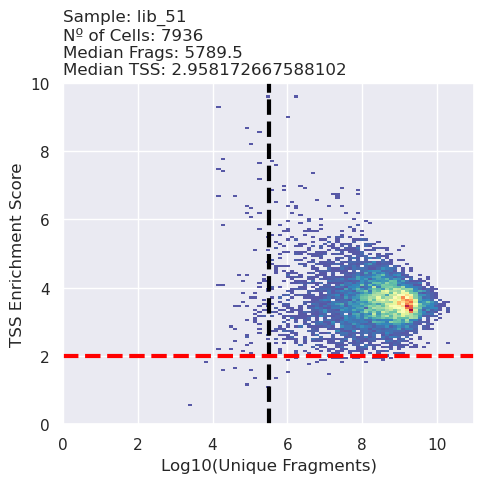

4812.0


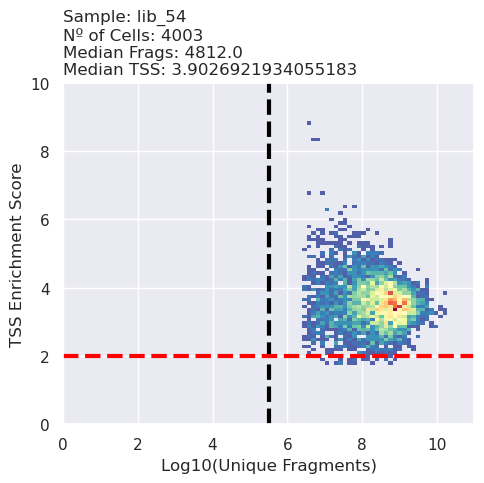

2650.5


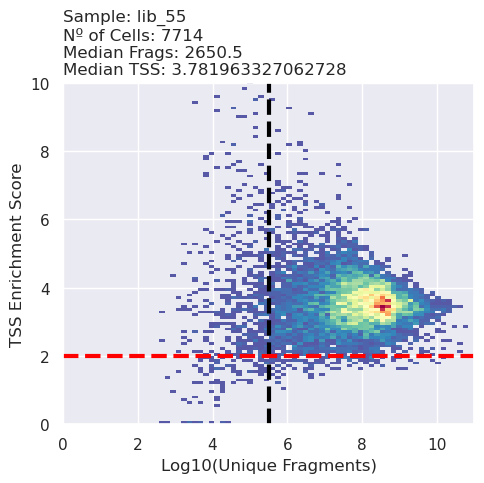

1059.0


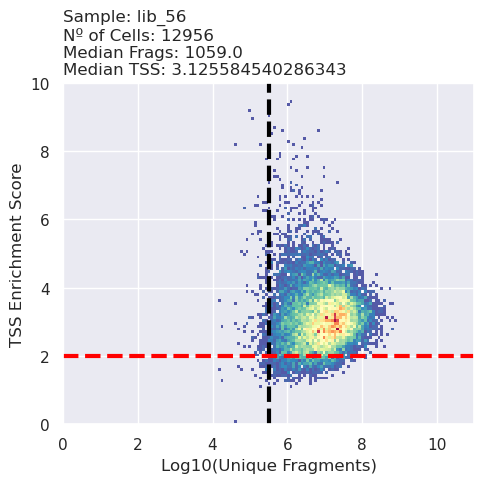

1703.0


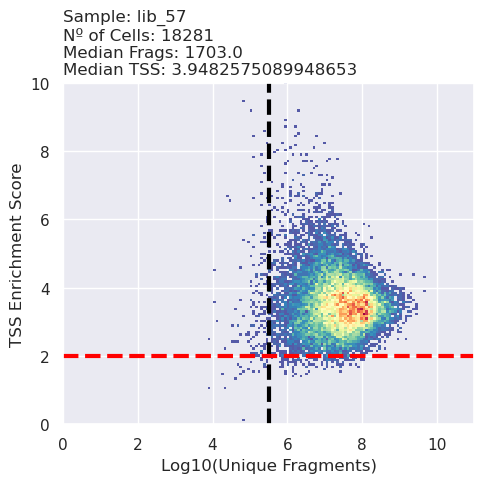

In [85]:
# sns.set_palette('coolwarm')
df_list=[]
for sample in np.sort(tss.obs['sample'].unique()):
    df = tss[tss.obs['sample'].isin([sample])].obs.copy()
    df['sample']=sample
    df_list.append(df)
for i in df_list:
    fig, ax = plt.subplots(figsize=(5, 5))

    g = sns.histplot(
        data=i,
        x="log1p_n_genes_by_counts",
        y="tss_score",
        # hue='sample',
        # bins=[200,200],
        cmap='Spectral_r',
        ax = ax
    )
    print(np.median(i['n_genes_by_counts']))
    plt.title(f"Sample: {i['sample'][0]}\nNº of Cells: {i.shape[0]}\nMedian Frags: {np.median(i['n_genes_by_counts'])}\nMedian TSS: {i['tss_score'][0]}", loc = 'left')
    plt.xlabel('Log10(Unique Fragments)')
    plt.ylabel('TSS Enrichment Score')

    l1 = g.axvline(np.log(250), color='black', label = 'Lower Cut-off',linewidth = 3, linestyle = '--')
    #l2 = g.axvline(20000, color='red', label = 'Upper Cut-off',linewidth = 3, linestyle = '--')
    l3 = g.axhline(2, color='red', label = 'Upper Cut-off',linewidth = 3, linestyle = '--')
    # ax.set_xscale('log')

    
    
    g.set(ylim=(0,10), xlim=(0,11))
    name = i['sample'][0]
    plt.tight_layout()
    plt.savefig(f'figures/2d_hist/{name}.png')
    plt.show()
    